# NLP and ML Classification of Reviews
- **Darlene Adams**

### Imports / Data Prep

In [1]:
import pandas as pd
import joblib
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers, regularizers
# Then run the Enable Deterministic Operations Function
tf.config.experimental.enable_op_determinism()
# Random Seeds
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)


In [2]:
# Adding different sub folder
import sys
import os

# Append the path to the Data folder
data_folder_path = os.path.abspath('Data')
sys.path.append(data_folder_path)

## Load the autoreload extension
%load_ext autoreload
%autoreload 2

try:
    import functions as fn
    print("Custom_Functions module imported successfully!")
except ModuleNotFoundError:
    print(f"Failed to import Custom_Functions module from {data_folder_path}")

Custom_Functions module imported successfully!


In [3]:
fpath = 'Data/movie_reviews.joblib'
df = joblib.load(fpath)
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating,ratings,lower,tokens,tokens_as_strings,clean,lemmas,lemmas-joined,tokens_joined
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love...",9.0,high,"a guilty pleasure for me personally, as i love...","[a, guilty, pleasure, for, me, personally, ,, ...","a , guilty , pleasure , for , me , personally ...",a guilty pleasure for me personally as...,"[guilty, pleasure, personally, love, great, es...",guilty pleasure personally love great escape w...,"a guilty pleasure for me personally , as i lov..."
6,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straig...",3.0,low,"the first underwhelmed me, but this one straig...","[the, first, underwhelmed, me, ,, but, this, o...","the , first , underwhelmed , me , , , but , th...",the first underwhelmed me but this one...,"[underwhelme, straightup, bore, course, see, h...",underwhelme straightup bore course see hunt cl...,"the first underwhelmed me , but this one strai..."
7,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,After quite entertainign Mission Impossible I ...,2.0,low,after quite entertainign mission impossible i ...,"[after, quite, entertainign, mission, impossib...","after , quite , entertainign , mission , impos...",after quite entertainign mission impossibl...,"[entertainign, mission, impossible, second, in...",entertainign mission impossible second install...,after quite entertainign mission impossible i ...
15,608e2744d8cc4a0058dc4272,2621,tt0122459,Return to Me,"Okay, I will admit I can be a bit of an easy g...",9.0,high,"okay, i will admit i can be a bit of an easy g...","[okay, ,, i, will, admit, i, can, be, a, bit, ...","okay , , , i , will , admit , i , can , be , a...",okay i will admit i can be a bit of...,"[okay, admit, bit, easy, grader, come, romanti...",okay admit bit easy grader come romantic comed...,"okay , i will admit i can be a bit of an easy ..."
20,6409202f0e441900e887a17b,4234,tt0134084,Scream 3,**_Scream 3’s_ lackluster screenplay and unima...,4.0,low,**_scream 3’s_ lackluster screenplay and unima...,"[*, *, _scream, 3, ’, s_, lackluster, screenpl...","* , * , _scream , 3 , ’ , s_ , lackluster , sc...",scream 3 s lackluster screenplay an...,"[scream, 3, s, lackluster, screenplay, unimagi...",scream 3 s lackluster screenplay unimaginative...,* * _scream 3 ’ s_ lackluster screenplay and u...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2419 entries, 1 to 8647
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2419 non-null   object 
 1   movie_id           2419 non-null   int64  
 2   imdb_id            2419 non-null   object 
 3   original_title     2419 non-null   object 
 4   review             2419 non-null   object 
 5   rating             2419 non-null   float64
 6   ratings            2419 non-null   object 
 7   lower              2419 non-null   object 
 8   tokens             2419 non-null   object 
 9   tokens_as_strings  2419 non-null   object 
 10  clean              2419 non-null   object 
 11  lemmas             2419 non-null   object 
 12  lemmas-joined      2419 non-null   object 
 13  tokens_joined      2419 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 283.5+ KB


In [6]:
# check for reviews without ratings
df['ratings'].isna().sum()

0

In [7]:
df['ratings'].value_counts()

low     1224
high    1195
Name: ratings, dtype: int64

In [8]:
# assign X and y
X = df['review']
y = df['ratings']

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=42)

### Machine Learning Model

#### SKLEARN

In [10]:
# check class balance
y.value_counts(normalize=True)

low     0.505994
high    0.494006
Name: ratings, dtype: float64

In [11]:
## Create a pipeline with a vectorizer and classification model.
clf_pipe = Pipeline([('vectorizer', CountVectorizer(stop_words='english')),
                     ('clf',RandomForestClassifier(random_state=42))])
clf_pipe

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('clf', RandomForestClassifier(random_state=42))])

In [12]:
# fit model pipeline
clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('clf', RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       888
         low       1.00      1.00      1.00       926

    accuracy                           1.00      1814
   macro avg       1.00      1.00      1.00      1814
weighted avg       1.00      1.00      1.00      1814



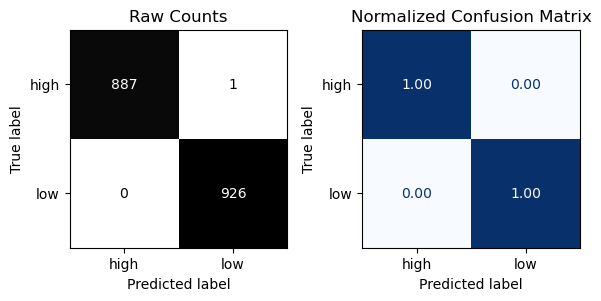


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.83      0.85      0.84       307
         low       0.84      0.82      0.83       298

    accuracy                           0.84       605
   macro avg       0.84      0.84      0.84       605
weighted avg       0.84      0.84      0.84       605



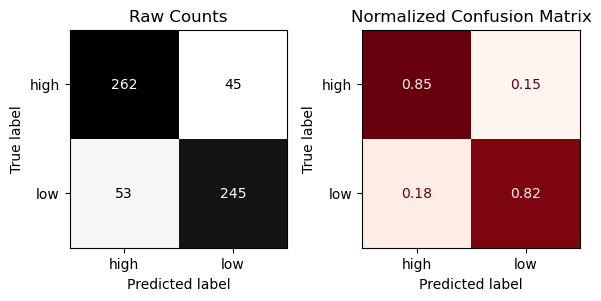

In [13]:
# evaluate model
fn.evaluate_classification(clf_pipe, X_train,y_train, X_test, y_test)

##### Observations:
- This model has an accuracy of .84
- There is not a large difference in accuracy between classes

#### GridSearch Text Vectorization

In [14]:
# Define params to try
param_grid_shared = {
    "vectorizer__max_df": [0.6, 0.7, 0.8],
    "vectorizer__min_df": [2,3,4],
    "vectorizer__max_features": [None, 1000, 2000],
    "vectorizer__stop_words": [None,'english'],
    "vectorizer__ngram_range": [(1, 1), (1, 2), (1,3)]
}

In [15]:
# Setting params for the count vectorizer
param_grid_count = {
    'vectorizer':[CountVectorizer()],
    **param_grid_shared
}

In [16]:
# Set up Pipeline to allow GridSearching
v_pipe = Pipeline([('vectorizer', CountVectorizer()),
                     ('clf',RandomForestClassifier(random_state=42))])

In [17]:
%%time
# Create grid search
grid_search = GridSearchCV(v_pipe, param_grid_shared, cv=2, scoring = 'accuracy', verbose=1, n_jobs=-1)

CPU times: total: 0 ns
Wall time: 0 ns


In [18]:
%%time
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits
CPU times: total: 4.8 s
Wall time: 3min 59s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'vectorizer__max_df': [0.6, 0.7, 0.8],
                         'vectorizer__max_features': [None, 1000, 2000],
                         'vectorizer__min_df': [2, 3, 4],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'vectorizer__stop_words': [None, 'english']},
             scoring='accuracy', verbose=1)

In [19]:
# what were the best params?
grid_search.best_params_

{'vectorizer__max_df': 0.6,
 'vectorizer__max_features': 1000,
 'vectorizer__min_df': 4,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__stop_words': 'english'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       888
         low       1.00      1.00      1.00       926

    accuracy                           1.00      1814
   macro avg       1.00      1.00      1.00      1814
weighted avg       1.00      1.00      1.00      1814



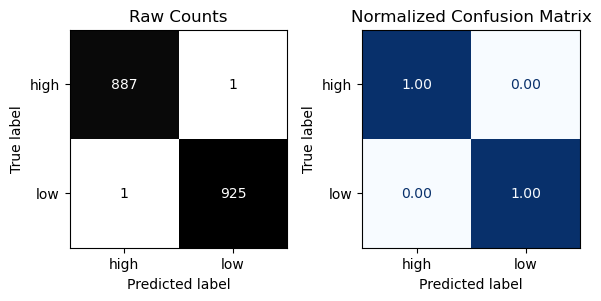


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

        high       0.83      0.83      0.83       307
         low       0.82      0.82      0.82       298

    accuracy                           0.83       605
   macro avg       0.83      0.83      0.83       605
weighted avg       0.83      0.83      0.83       605



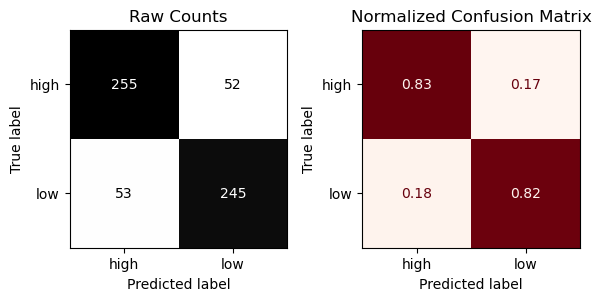

In [20]:
best_model = grid_search.best_estimator_

fn.evaluate_classification(best_model,X_train,y_train,X_test,y_test)

##### Observations:
- With best parameters the gridsearch an accuracy of .83

### Deep NLP

#### Prep / Train Dataset

In [21]:
# instantiate LabelEncoder
encoder = LabelEncoder()

In [22]:
# Fit and Transform the strings into integers
y = pd.Series(encoder.fit_transform(y))
y.value_counts()

1    1224
0    1195
dtype: int64

In [23]:
# Convert to Dataset object
ds = tf.data.Dataset.from_tensor_slices((X, y))
ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [24]:
# shuffle data once
ds = ds.shuffle(buffer_size=len(ds), reshuffle_each_iteration=False)

In [25]:
# Add a column to the dataframe that has the length of each paragraph
df['sequence_length'] = df['review'].map( lambda x: len(x.split(" ")))

In [26]:

df['sequence_length'].describe()

count    2419.000000
mean      225.767673
std       270.815728
min         1.000000
25%        62.000000
50%       143.000000
75%       286.500000
max      4017.000000
Name: sequence_length, dtype: float64

In [27]:
# maximum length = sequence length max
SEQUENCE_LENGTH = 4017

In [28]:
# Set the ratio of the train, validation, test split
split_train = .7
split_val =  .2
split_test =  1 -( split_train + split_val )

In [29]:
# Calculate the number of samples for training and validation data
n_train_samples =  int(len(ds) * split_train)
n_val_samples = int(len(ds) * split_val)
n_test_samples = len(ds) -(n_train_samples + n_val_samples)

In [30]:
# Set the batch size
BATCH_SIZE =32

In [31]:
# Use take and skip to define each set
train_ds = ds.take(n_train_samples).batch(batch_size=BATCH_SIZE)

# Skip over the training batches and take the validation batches
val_ds = ds.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)

# Skipver the train and validation batches, the remaining are the test batches
test_ds = ds.skip(n_train_samples + n_val_samples).batch(batch_size=BATCH_SIZE)

In [32]:
# Get just the text from ds_train
ds_texts = train_ds.map(lambda x, y: x)

#### Creating Keras Text Vectorization Layer

In [33]:
# Create keras text Vectorization layer
sequence_vectorizer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH
)

In [34]:
# Fit/Adapt the text vectorization layer on the training texts.
sequence_vectorizer.adapt(ds_texts)

In [35]:
# Save the vocabulary size from the layer to use in your models' Embedding layer.
VOCAB_SIZE = sequence_vectorizer.vocabulary_size()

In [36]:
# unique classes
classes = y.unique()
classes

array([0, 1])

#### RNN

In [37]:
# Function - using the model that performed best in core projects
def build_gru_model_bi_pool(text_vectorization_layer):

    gru_model_bi_pool = Sequential([
        text_vectorization_layer,
        layers.Embedding(input_dim=VOCAB_SIZE,
                      output_dim=EMBED_DIM,
                      input_length=SEQUENCE_LENGTH)])

    # Add bidirectional component to GRU layer
    gru_model_bi_pool.add(layers.Bidirectional(layers.GRU(64, return_sequences = True)))
    gru_model_bi_pool.add(layers.Dropout(.2))
    gru_model_bi_pool.add(layers.Bidirectional(layers.GRU(32, return_sequences = True)))
    # Add a pooling layer *new
    gru_model_bi_pool.add(layers.GlobalMaxPooling1D())

    # Output layer
    gru_model_bi_pool.add(layers.Dense(len(classes), activation='softmax'))

    optimizer = optimizers.legacy.Adam()
    gru_model_bi_pool.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    gru_model_bi_pool.summary()
    return gru_model_bi_pool

In [38]:
EMBED_DIM = 100
#Build the model
model = build_gru_model_bi_pool(sequence_vectorizer)
# Fit the model
EPOCHS = 30
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=fn.get_callbacks(),
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 4017)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 4017, 100)         2492300   
                                                                 
 bidirectional (Bidirectiona  (None, 4017, 128)        63744     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 4017, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4017, 64)         31104     
 nal)                                                            
                                                        

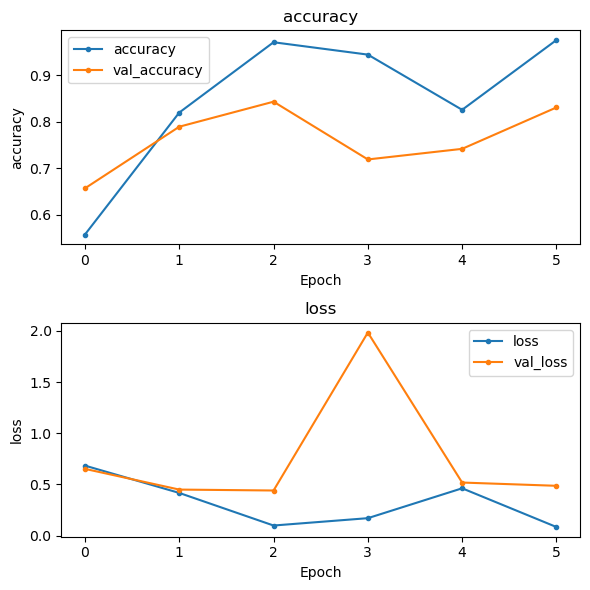


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       856
           1       1.00      1.00      1.00       837

    accuracy                           1.00      1693
   macro avg       1.00      1.00      1.00      1693
weighted avg       1.00      1.00      1.00      1693



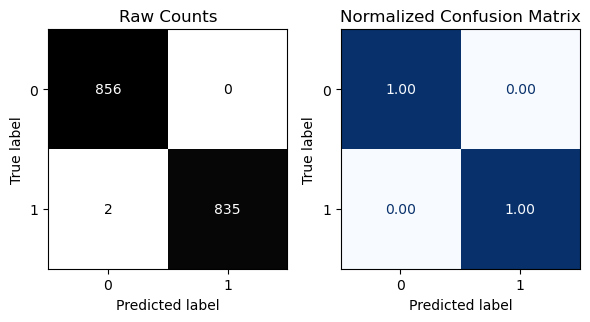


- Evaluating Training Data:
53/53 [==============================] - 58s 1s/step - loss: 0.0084 - accuracy: 0.9988
{'loss': 0.008370901457965374, 'accuracy': 0.9988186359405518}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       113
           1       0.85      0.76      0.80       130

    accuracy                           0.80       243
   macro avg       0.80      0.81      0.80       243
weighted avg       0.81      0.80      0.80       243



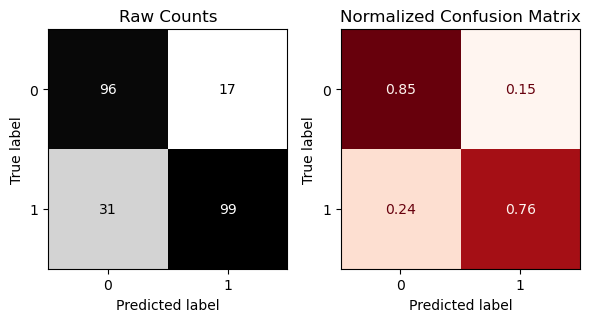


- Evaluating Test Data:
8/8 [==============================] - 8s 1s/step - loss: 0.5782 - accuracy: 0.8025
{'loss': 0.5782195329666138, 'accuracy': 0.8024691343307495}


In [39]:
# Evaluate the model
results = fn.evaluate_classification_network(
    model, X_train=train_ds,
    X_test=test_ds, history=history);

##### Observations:
- Test data accuracy is .80

### **Observation and Model Analysis**

I created 3 models to analyze. I created a basic random forest classifier, for the next model I tuned some of the parameters using grid search to try to create the best model, and finally I created a bidirectional GRU. 
The accuracy on all  3 models was similar. TheRandom Forest had the highestd accuracy of 84% while the tuned model had 83%.
Notably the basic Random Forest had the best precision, recall and F1 scores for the High review. 83, 85, and 84, respectively. The bidirectional GRmatched the High recall score of 85% and had the highest precistion on the Low reviews with 85% but fell behind the other models in every other category and had only an overall accuracy of 80%rd


Random Forest: accuracy .84
- High
    - precision - .83
    - recall - .85
    - f1 score - .84
- Low
    - precision - .84
    - recall - .82
    - f1 score - .83
 
Grid Search: accuracy .83
- High
    - precision - .83
    - recall - .83
    - f1 score - .83
- Low
    - precision - .82
    - recall - .82
    - f1 score - .82
 
Bi-GRU: accuracy .80
- High
    - precision - .76
    - recall - .85
    - f1 score - .80
- Low
    - precision - .85
    - recall - .76
    - f1 score - .80l.